In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cv2

%matplotlib inline


In [6]:
data = pd.read_csv("SHIB-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,1604789
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,193098
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,129225
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,19717
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,26869


In [ ]:
data.info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       602 non-null    object 
 1   Open       602 non-null    float64
 2   High       602 non-null    float64
 3   Low        602 non-null    float64
 4   Close      602 non-null    float64
 5   Adj Close  602 non-null    float64
 6   Volume     602 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.0+ KB


In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,0.000012,0.000013,0.000011,0.000012,0.000012,1.131264e+09
std,0.000016,0.000017,0.000015,0.000016,0.000016,3.023558e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.450000e+03
50%,0.000006,0.000007,0.000006,0.000006,0.000006,2.647369e+08
75%,0.000022,0.000024,0.000022,0.000023,0.000023,9.932311e+08
max,0.000079,0.000088,0.000067,0.000080,0.000080,3.905385e+10


In [12]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
597,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False
599,False,False,False,False,False,False,False
600,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

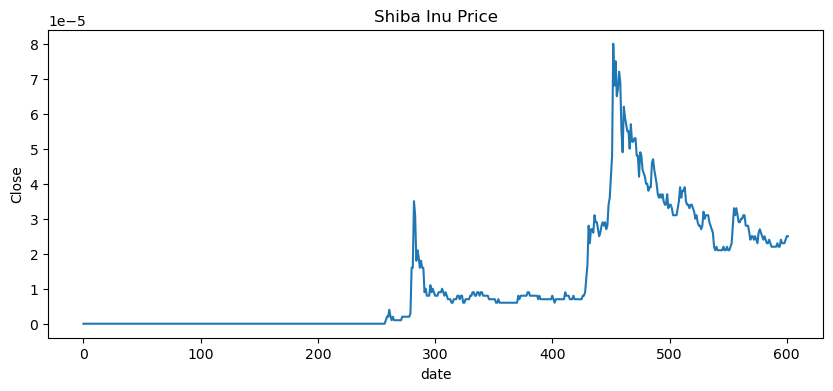

In [19]:
data.dropna()
plt.figure(figsize=(10, 4))
plt.title("Shiba Inu Price")
plt.xlabel("date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [20]:
from seaborn import regression

In [24]:
pip install AutoTS

     ------------------------------------ 672.4/672.4 kB 756.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("Shiba Inu Price Prediction")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 9 with model DatepartRegression in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generation 0 of 10
Model Number: 15 with model GLS in generation 0 of 10
Model Number: 16 with model GLS in generation 0 of 10
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 17: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 18: GluonTS
Model Number: 19 with model GluonTS in generation 0 of 10
Template Eval Error: Impor

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.


Model Number: 60 with model NVAR in generation 0 of 10


[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 71: FBProphet
Mod

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 78 with model DatepartRegression in generation 0 of 10
Model Number: 79 with model UnivariateRegression in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 80 with model MultivariateRegression in generation 0 of 10
Model Number: 81 with model UnivariateMotif in generation 0 of 10
Model Number: 82 with model MultivariateMotif in generation 0 of 10
Model Number: 83 with model SectionalMotif in generation 0 of 10
Model Number: 84 with model NVAR in generation 0 of 10
Model Number: 85 with model Theta in generation 0 of 10
Model Number: 86 with model ARDL in generation 0 of 10
Model Number: 87 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 87: ARCH
Model Number: 88 with model MetricMotif in generation 0 of 10
Model Number: 89 with model SeasonalityMotif in generation 0 of 10
Model Number: 90 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 90: UnivariateRegression
Model Number: 91 with model GluonTS in generation 0 of 10
Template Eva

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 105 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105: VAR
Model Number: 106 with model GLS in generation 0 of 10
Model Number: 107 with model GLS in generation 0 of 10
Model Number: 108 with model MultivariateMotif in generation 0 of 10
Model Number: 109 with model AverageValueNaive in generation 0 of 10
Model Number: 110 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 110: SectionalMotif
Model Number: 111 with model SeasonalityMotif in generation 0 of 10
Model Number: 112 with model GLM in generation 0 of 10
Model Number: 113 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 113: VECM
Model Number: 114 with model UnobservedComponents in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 115 with model SeasonalityMotif in generation 0 of 10
Model Number: 116 with model WindowRegression in generation 0 of 10
Model Number: 117 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 117: ARCH
Model Number: 118 with model MetricMotif in generation 0 of 10
Model Number: 119 with model GLM in generation 0 of 10
Model Number: 120 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 120: GluonTS
Model Number: 121 with model LastValueNaive in generation 0 of 10
Model Number: 122 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 122: UnobservedComponents
Model Number: 123 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regresso

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: ImportError('`arch` package must be installed from pip') in model 139: ARCH
Model Number: 140 with model UnobservedComponents in generation 0 of 10
Model Number: 141 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 141: ARCH
Model Number: 142 with model Theta in generation 0 of 10
Model Number: 143 with model Theta in generation 0 of 10
Model Number: 144 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 144: MultivariateRegression
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ETS in generation 0 of 10
Model Number: 148 with model MultivariateMotif in generation 0 of 10
Model Number: 149 with model ConstantNaive in generation 0 of 10
Model Number: 150 with model SeasonalNaive in g

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 156 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 156: MultivariateRegression
Model Number: 157 with model NVAR in generation 0 of 10
Model Number: 158 with model UnobservedComponents in generation 0 of 10

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)



Model Number: 159 with model MetricMotif in generation 0 of 10
Model Number: 160 with model UnobservedComponents in generation 0 of 10
Model Number: 161 with model SeasonalityMotif in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 163: ARCH
Model Number: 164 with model SeasonalityMotif in generation 0 of 10
Model Number: 165 with model SeasonalityMotif in generation 0 of 10
Model Number: 166 with model NVAR in generation 0 of 10
Model Number: 167 with model DatepartRegression in generation 0 of 10
Model Number: 168 with model UnobservedComponents in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 169 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 169: ARCH
Model Number: 170 with model UnivariateMotif in generation 0 of 10
Model Number: 171 with model AverageValueNaive in generation 0 of 10
Model Number: 172 with model ConstantNaive in generation 0 of 10
Model Number: 173 with model LastValueNaive in generation 0 of 10
Model Number: 174 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 174: UnivariateRegression
Model Number: 175 with model MetricMotif in generation 0 of 10
No anomalies detected.
Model Number: 176 with model MultivariateRegression in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    1.5s


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 176: MultivariateRegression
Model Number: 177 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 177: GLM
Model Number: 178 with model ConstantNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.9s finished
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 179 with model MultivariateMotif in generation 0 of 10
Model Number: 180 with model SeasonalityMotif in generation 0 of 10
Model Number: 181 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 181: VECM
Model Number: 182 with model SeasonalityMotif in generation 0 of 10
Model Number: 183 with model SectionalMotif in generation 0 of 10
Model Number: 184 with model SeasonalNaive in generation 0 of 10
Model Number: 185 with model SectionalMotif in generation 0 of 10
Model Number: 186 with model SeasonalNaive in generation 0 of 10
Model Number: 187 with model SeasonalityMotif in generation 0 of 10
Model Number: 188 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 188: GLM
Model Number: 189 with model UnobservedComponents in generation 0 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 190 with model SeasonalityMotif in generation 0 of 10
Model Number: 191 with model MultivariateMotif in generation 0 of 10
Model Number: 192 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 192: Theta
Model Number: 193 with model SeasonalNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 194 with model SectionalMotif in generation 1 of 10
Model Number: 195 with model DatepartRegression in generation 1 of 10
Model Number: 196 with model AverageValueNaive in generation 1 of 10
Model Number: 197 with model UnivariateRegression in generation 1 of 10
No anomalies detected.
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 197: UnivariateRegression
Model Number: 198 with model MetricMotif in generation 1 of 10
Model Number: 199 with model MetricMotif in generation 1 of 10
Model Number: 200 with model LastValueNaive in generation 1 of 10
Model Num

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 219 with model WindowRegression in generation 1 of 10
Model Number: 220 with model SeasonalNaive in generation 1 of 10
Model Number: 221 with model MultivariateRegression in generation 1 of 10
Model Number: 222 with model LastValueNaive in generation 1 of 10
Model Number: 223 with model UnivariateRegression in generation 1 of 10
Model Number: 224 with model NVAR in generation 1 of 10
Model Number: 225 with model ARDL in generation 1 of 10
Model Number: 226 with model SeasonalityMotif in generation 1 of 10
Model Number: 227 with model GLM in generation 1 of 10
Model Number: 228 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 228: DatepartRegression
Model Number: 229 with model LastValueNaive in generation 1 of 10
Model Number: 230 with model NVAR in generation 1 of 10
Model Number: 231 with model LastValueNaive in generation 1 of 10
Model Number: 232 with model Multivariat

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 236 with model UnivariateMotif in generation 1 of 10
Model Number: 237 with model ConstantNaive in generation 1 of 10
Model Number: 238 with model GLM in generation 1 of 10
Model Number: 239 with model UnobservedComponents in generation 1 of 10
Model Number: 240 with model MetricMotif in generation 1 of 10
Model Number: 241 with model LastValueNaive in generation 1 of 10
Model Number: 242 with model MultivariateMotif in generation 1 of 10
Model Number: 243 with model SeasonalityMotif in generation 1 of 10
Model Number: 244 with model UnivariateMotif in generation 1 of 10
Model Number: 245 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 245: WindowRegression
Model Number: 246 with model SeasonalityMotif in generation 1 of 10
Model Number: 247 with model AverageValueNaive in generation 1 of 10
Model Number: 248 with model MultivariateRegression in generation 1 of 10
Model Num

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 258 with model GLM in generation 1 of 10
Model Number: 259 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 259: GLM
Model Number: 260 with model SeasonalNaive in generation 1 of 10
Model Number: 261 with model ARIMA in generation 1 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 262 with model MetricMotif in generation 1 of 10
Model Number: 263 with model ARIMA in generation 1 of 10
Model Number: 264 with model LastValueNaive in generation 1 of 10
Model Number: 265 with model Theta in generation 1 of 10
Model Number: 266 with model GLM in generation 1 of 10
Model Number: 267 with model LastValueNaive in generation 1 of 10
Model Number: 268 with model SeasonalityMotif in generation 1 of 10
Model Number: 269 with model SeasonalityMotif in generation 1 of 10
Model Number: 270 with model SeasonalityMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 270: SeasonalityMotif
Model Number: 271 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 271: MultivariateRegression
Model Number: 272 with model SectionalMotif in generation 1 of 10
Model Number: 273 with model Theta in gener

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 274 with model SeasonalNaive in generation 1 of 10
Model Number: 275 with model AverageValueNaive in generation 1 of 10
Model Number: 276 with model MultivariateMotif in generation 1 of 10
Model Number: 277 with model GLS in generation 1 of 10
Model Number: 278 with model GLM in generation 1 of 10
Model Number: 279 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 279: MetricMotif
Model Number: 280 with model LastValueNaive in generation 1 of 10
Model Number: 281 with model GLM in generation 1 of 10
Model Number: 282 with model Theta in generation 1 of 10
Model Number: 283 with model LastValueNaive in generation 1 of 10
Model Number: 284 with model WindowRegression in generation 1 of 10
Model Number: 285 with model NVAR in generation 1 of 10
Model Number: 286 with model MultivariateMotif in generation 1 of 10
Model Number: 287 with model UnobservedComponents in generation 1 of 10
Model Number: 2

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 318 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elaps

Model Number: 319 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 319: ARDL
Model Number: 320 with model SeasonalityMotif in generation 1 of 10


[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 321 with model UnivariateRegression in generation 1 of 10
Model Number: 322 with model ConstantNaive in generation 1 of 10
Model Number: 323 with model UnobservedComponents in generation 1 of 10
New Generation: 2 of 10
Model Number: 324 with model AverageValueNaive in generation 2 of 10
Model Number: 325 with model Theta in generation 2 of 10
Model Number: 326 with model NVAR in generation 2 of 10
Model Number: 327 with model ConstantNaive in generation 2 of 10
Model Number: 328 with model MetricMotif in generation 2 of 10
Model Number: 329 with model AverageValueNaive in generation 2 of 10
Model Number: 330 with model SeasonalNaive in generation 2 of 10
Model Number: 331 with model SectionalMotif in generation 2 of 10
Model Number: 332 with model Theta in generation 2 of 10
Model Number: 333 with model GLM in generation 2 of 10
Model Number: 334 with model ETS in generation 2 of 10
Model Number: 335 with model ARIMA in generation 2 of 10
Model Number: 336 with model Mult

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 393 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 394 with model WindowRegression in generation 2 of 10
Model Number: 395 with model NVAR in generation 2 of 10
Model Number: 396 with model NVAR in generation 2 of 10
Model Number: 397 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 397: ARIMA
Model Number: 398 with model GLM in generation 2 of 10
Model Number: 399 with model MetricMotif in generation 2 of 10
Model Number: 400 with model WindowRegression in generation 2 of 10
Model Number: 401 with model SeasonalityMotif in generation 2 of 10
Model Number: 402 with model SeasonalityMotif in generation 2 of 10
Model Number: 403 with model Theta in generation 2 of 10
Model Number: 404 with model MultivariateMotif in generation 2 of 10
Model Number: 405 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 405: MultivariateMotif
Model Number: 406 with model

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Model Number: 410 with model SeasonalityMotif in generation 2 of 10
Model Number: 411 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 411: NVAR
Model Number: 412 with model NVAR in generation 2 of 10
Model Number: 413 with model ConstantNaive in generation 2 of 10
Model Number: 414 with model SectionalMotif in generation 2 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Model Number: 415 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 415: UnobservedComponents
Model Number: 416 with model AverageValueNaive in generation 2 of 10
Model Number: 417 with model GLS in generation 2 of 10
Model Number: 418 with model ETS in generation 2 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 419 with model LastValueNaive in generation 2 of 10
Model Number: 420 with model MetricMotif in generation 2 of 10
Model Number: 421 with model ETS in generation 2 of 10
Model Number: 422 with model MultivariateRegression in generation 2 of 10
Model Number: 423 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 424 with model SectionalMotif in generation 2 of 10


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 425 with model Theta in generation 2 of 10
Model Number: 426 with model GLM in generation 2 of 10
Model Number: 427 with model AverageValueNaive in generation 2 of 10
Model Number: 428 with model DatepartRegression in generation 2 of 10
Model Number: 429 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 430 with model ARIMA in generation 2 of 10
Model Number: 431 with model MultivariateMotif in generation 2 of 10
Model Number: 432 with model MultivariateRegression in generation 2 of 10
Model Number: 433 with model ARIMA in generation 2 of 10
Model Number: 434 with model SectionalMotif in generation 2 of 10
Model Number: 435 with model SeasonalityMotif in generation 2 of 10
Model Number: 436 with model GLM in generation 2 of 10
Model Numbe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

New Generation: 3 of 10
Model Number: 454 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 454: SectionalMotif
Model Number: 455 with model UnivariateMotif in generation 3 of 10
Model Number: 456 with model MetricMotif in generation 3 of 10
Model Number: 457 with model MultivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 457: MultivariateRegression
Model Number: 458 with model Theta in generation 3 of 10
Model Number: 459 with model NVAR in generation 3 of 10
Model Number: 460 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 460: GLM
Model Number: 461 with model SeasonalityMotif in generation 3 of 10
Model Number: 462 with model LastValueNaive in generation 3 of 10
Model Number: 463 with model ConstantNaive in generation 3 of 10
Model Number: 464 with model Unobse

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 473 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 473: DatepartRegression
Model Number: 474 with model SeasonalityMotif in generation 3 of 10
Model Number: 475 with model SeasonalityMotif in generation 3 of 10
Model Number: 476 with model LastValueNaive in generation 3 of 10
Model Number: 477 with model ARDL in generation 3 of 10
Model Number: 478 with model NVAR in generation 3 of 10
Model Number: 479 with model UnobservedComponents in generation 3 of 10
Model Number: 480 with model ConstantNaive in generation 3 of 10
Model Number: 481 with model SectionalMotif in generation 3 of 10
Model Number: 482 with model MetricMotif in generation 3 of 10
Model Number: 483 with model UnobservedComponents in generation 3 of 10
Model Number: 484 with model SeasonalNaive in generation 3 of 10
Model Number: 485 with model ARIMA in generation 3 of 10
Model Number: 486 with model LastV

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 514 with model ARDL in generation 3 of 10
Model Number: 515 with model GLS in generation 3 of 10
Model Number: 516 with model SeasonalNaive in generation 3 of 10
Model Number: 517 with model WindowRegression in generation 3 of 10
Model Number: 518 with model ConstantNaive in generation 3 of 10
Model Number: 519 with model SeasonalityMotif in generation 3 of 10
Model Number: 520 with model UnivariateRegression in generation 3 of 10
Model Number: 521 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 522 with model MetricMotif in generation 3 of 10


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 523 with model WindowRegression in generation 3 of 10
Model Number: 524 with model Theta in generation 3 of 10
Model Number: 525 with model MultivariateMotif in generation 3 of 10
Model Number: 526 with model NVAR in generation 3 of 10
Model Number: 527 with model ConstantNaive in generation 3 of 10
Model Number: 528 with model NVAR in generation 3 of 10
Model Number: 529 with model MultivariateMotif in generation 3 of 10
Model Number: 530 with model NVAR in generation 3 of 10
Model Number: 531 with model LastValueNaive in generation 3 of 10
Model Number: 532 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 532: MultivariateRegression
Model Number: 533 with model UnobservedComponents in generation 3 of 10
Model Number: 534 with model MetricMotif in generation 3 of 10
Model Number: 535 with model AverageValueNaive in generation 3 of 10
Model Number: 536 with model NVAR in generation 3 of

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning: divide by zero encountered in true_divide
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 544 with model SeasonalityMotif in generation 3 of 10
Model Number: 545 with model SeasonalityMotif in generation 3 of 10
Model Number: 546 with model MetricMotif in generation 3 of 10
Model Number: 547 with model GLM in generation 3 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 548 with model GLS in generation 3 of 10
Model Number: 549 with model MultivariateMotif in generation 3 of 10
Model Number: 550 with model MultivariateRegression in generation 3 of 10
Model Number: 551 with model MultivariateRegression in generation 3 of 10
Model Number: 552 with model WindowRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 552: WindowRegression
Model Number: 553 with model ConstantNaive in generation 3 of 10
Model Number: 554 with model LastValueNaive in generation 3 of 10
Model Number: 555 with model MultivariateRegression in generation 3 of 10
Model Number: 556 with model SectionalMotif in generation 3 of 10
Model Number: 557 with model SectionalMotif in generation 3 of 10
Model Number: 558 with model ARIMA in generation 3 of 10
Model Number: 559 with model SeasonalNaive in generation 3 of 10
Model Number: 560 with model AverageValueNaive in generation 3 of 10
Model Number: 561 with model LastVal

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning: invalid value encountered in true_divide
  post_mu = (


Model Number: 580 with model UnivariateMotif in generation 3 of 10
Model Number: 581 with model NVAR in generation 3 of 10
Model Number: 582 with model UnivariateRegression in generation 3 of 10
Model Number: 583 with model ARDL in generation 3 of 10
New Generation: 4 of 10
Model Number: 584 with model ARDL in generation 4 of 10
Model Number: 585 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 586 with model ARDL in generation 4 of 10
Model Number: 587 with model Theta in generation 4 of 10
Model Number: 588 with model MetricMotif in generation 4 of 10
Model Number: 589 with model ARIMA in generation 4 of 10
Model Number: 590 with model SeasonalNaive in generation 4 of 10
Model Number: 591 with model MultivariateMotif in generation 4 of 10
Model Number: 592 with model SeasonalNaive in generation 4 of 10
Model Number: 593 with model ARIMA in generation 4 of 10
Model Number: 594 with model MultivariateMotif in generation 4 of 10
Model Number: 595 with model SeasonalNaive in generation 4 of 10
Model Number: 596 with model ARIMA in generation 4 of 10
Model Number: 597 with model NVAR in generation 4 of 10
Model Number: 598 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 598: MultivariateMotif
Model Number: 599 with model SeasonalityMotif in generation 4 of 10
Model Number: 600 with mode

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 631 with model UnobservedComponents in generation 4 of 10
Model Number: 632 with model SeasonalityMotif in generation 4 of 10
Model Number: 633 with model NVAR in generation 4 of 10
Model Number: 634 with model LastValueNaive in generation 4 of 10
Model Number: 635 with model MetricMotif in generation 4 of 10
Model Number: 636 with model AverageValueNaive in generation 4 of 10
Model Number: 637 with model MetricMotif in generation 4 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 637: MetricMotif
Model Number: 638 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 638: GLM
Model Number: 639 with model Theta in generation 4 of 10
Model Number: 640 with model MultivariateMotif in generation 4 of 10
Model Number: 641 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 641: GLS
Model Number: 642 with model LastValueNaive in generation 4 of 10
Model Number: 643 with model MultivariateRegression in generation 4 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.81039e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 644 with model SectionalMotif in generation 4 of 10
Model Number: 645 with model Theta in generation 4 of 10
Model Number: 646 with model SeasonalityMotif in generation 4 of 10
Model Number: 647 with model SeasonalityMotif in generation 4 of 10
Model Number: 648 with model AverageValueNaive in generation 4 of 10
Model Number: 649 with model MultivariateMotif in generation 4 of 10
Model Number: 650 with model UnivariateRegression in generation 4 of 10
Model Number: 651 with model WindowRegression in generation 4 of 10
Model Number: 652 with model ConstantNaive in generation 4 of 10
Model Number: 653 with model MultivariateMotif in generation 4 of 10
Model Number: 654 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 654: GLM
Model Number: 655 with model ETS in generation 4 of 10
Model Number: 656 with model SeasonalityMotif in generation 4 of 10
Model Number: 657 with model AverageValueNaive

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 661 with model UnobservedComponents in generation 4 of 10
Model Number: 662 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 662: GLM
Model Number: 663 with model NVAR in generation 4 of 10
Model Number: 664 with model LastValueNaive in generation 4 of 10
Model Number: 665 with model LastValueNaive in generation 4 of 10
Model Number: 666 with model Theta in generation 4 of 10
Model Number: 667 with model LastValueNaive in generation 4 of 10
Model Number: 668 with model WindowRegression in generation 4 of 10
Model Number: 669 with model UnivariateMotif in generation 4 of 10
Model Number: 670 with model WindowRegression in generation 4 of 10
Model Number: 671 with model UnivariateMotif in generation 4 of 10
Model Number: 672 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 672: NVAR
Model Number: 673 with model Seasonal

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 675 with model NVAR in generation 4 of 10
Model Number: 676 with model ConstantNaive in generation 4 of 10
Model Number: 677 with model SectionalMotif in generation 4 of 10
Model Number: 678 with model MultivariateMotif in generation 4 of 10
Model Number: 679 with model GLM in generation 4 of 10
Model Number: 680 with model GLM in generation 4 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 681 with model WindowRegression in generation 4 of 10
Model Number: 682 with model MultivariateMotif in generation 4 of 10
Model Number: 683 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 683: UnobservedComponents
Model Number: 684 with model Theta in generation 4 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 685 with model MetricMotif in generation 4 of 10
Model Number: 686 with model ARDL in generation 4 of 10
Model Number: 687 with model ARIMA in generation 4 of 10
Model Number: 688 with model SeasonalityMotif in generation 4 of 10
Model Number: 689 with model GLM in generation 4 of 10
Model Number: 690 with model ARDL in generation 4 of 10
Model Number: 691 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 692 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 693 with model UnivariateMotif in generation 4 of 10
Model Number: 694 with model GLS in generation 4 of 10
Model Number: 695 with model UnivariateMotif in generation 4 of 10
Model Number: 696 with model ARDL in generation 4 of 10
Model Number: 697 with model SectionalMotif in generation 4 of 10
Model Number: 698 with model SeasonalNaive in generation 4 of 10
Model Number: 699 with model AverageValueNaive in generation 4 of 10
Model Number: 700 with model NVAR in generation 4 of 10
Model Number: 701 with model Theta in generation 4 of 10
Model Number: 702 with model SectionalMotif in generation 4 of 10
Model Number: 703 with model AverageValueNaive in generation 4 of 10
Model Number: 704 with model ConstantNaive in generation 4 of 10
Model Number: 705 with model ConstantNaive in generation 4 of 10
Model Number: 706 with model NVAR in generation 4 of 10
Model Number: 707 with model SeasonalityMotif in generation 4 of 10
Model Number: 708 with model WindowRegression in gene

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 710 with model ConstantNaive in generation 4 of 10
Model Number: 711 with model AverageValueNaive in generation 4 of 10
Model Number: 712 with model Theta in generation 4 of 10
Model Number: 713 with model Theta in generation 4 of 10
New Generation: 5 of 10
Model Number: 714 with model LastValueNaive in generation 5 of 10
Model Number: 715 with model MultivariateRegression in generation 5 of 10
Model Number: 716 with model MetricMotif in generation 5 of 10
Model Number: 717 with model GLM in generation 5 of 10
Model Number: 718 with model UnivariateMotif in generation 5 of 10
Model Number: 719 with model NVAR in generation 5 of 10
Model Number: 720 with model UnobservedComponents in generation 5 of 10
Model Number: 721 with model LastValueNaive in generation 5 of 10
Model Number: 722 with model LastValueNaive in generation 5 of 10
Model Number: 723 with model ARDL in generation 5 of 10
Model Number: 724 with model NVAR in generation 5 of 10
Model Number: 725 with model Mu

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 779 with model UnivariateMotif in generation 5 of 10
Model Number: 780 with model UnobservedComponents in generation 5 of 10
Model Number: 781 with model ARDL in generation 5 of 10
Model Number: 782 with model UnivariateRegression in generation 5 of 10
Model Number: 783 with model GLM in generation 5 of 10
Model Number: 784 with model SeasonalityMotif in generation 5 of 10
Model Number: 785 with model AverageValueNaive in generation 5 of 10
Model Number: 786 with model MetricMotif in generation 5 of 10
Model Number: 787 with model UnivariateRegression in generation 5 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 788 with model MetricMotif in generation 5 of 10
Model Number: 789 with model ARIMA in generation 5 of 10
Model Number: 790 with model MultivariateRegression in generation 5 of 10
Model Number: 791 with model LastValueNaive in generation 5 of 10
Model Number: 792 with model ARDL in generation 5 of 10
Model Number: 793 with model MultivariateMotif in generation 5 of 10
Model Number: 794 with model AverageValueNaive in generation 5 of 10
Model Number: 795 with model LastValueNaive in generation 5 of 10
Model Number: 796 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 797 with model MetricMotif in generation 5 of 10
Model Number: 798 with model UnivariateMotif in generation 5 of 10
Model Number: 799 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") i

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 810 with model UnobservedComponents in generation 5 of 10
Model Number: 811 with model Theta in generation 5 of 10
Model Number: 812 with model SeasonalityMotif in generation 5 of 10
Model Number: 813 with model MultivariateMotif in generation 5 of 10
Model Number: 814 with model MultivariateMotif in generation 5 of 10
Model Number: 815 with model ConstantNaive in generation 5 of 10
Model Number: 816 with model MetricMotif in generation 5 of 10
Model Number: 817 with model NVAR in generation 5 of 10
New Generation: 6 of 10
Model Number: 818 with model MultivariateRegression in generation 6 of 10
Model Number: 819 with model ConstantNaive in generation 6 of 10
Model Number: 820 with model ARDL in generation 6 of 10
Model Number: 821 with model NVAR in generation 6 of 10
Model Number: 822 with model AverageValueNaive in generation 6 of 10
Model Number: 823 with model MetricMotif in generation 6 of 10
Model Number: 824 with model MetricMotif in generation 6 of 10
Model Numbe

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 886 with model ARDL in generation 6 of 10
Model Number: 887 with model Theta in generation 6 of 10
Model Number: 888 with model Theta in generation 6 of 10
Model Number: 889 with model MultivariateRegression in generation 6 of 10
Model Number: 890 with model MultivariateRegression in generation 6 of 10
Model Number: 891 with model AverageValueNaive in generation 6 of 10
Model Number: 892 with model SectionalMotif in generation 6 of 10
Model Number: 893 with model Theta in generation 6 of 10
Model Number: 894 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 894: MultivariateRegression
Model Number: 895 with model MetricMotif in generation 6 of 10
Model Number: 896 with model ARIMA in generation 6 of 10
Model Number: 897 with model SeasonalityMotif in generation 6 of 10
Model Number: 898 with model ARIMA in generation 6 of 10
Model Number: 899 with model UnivariateMotif in generation 6 of 10

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 910 with model SectionalMotif in generation 6 of 10
Model Number: 911 with model ARIMA in generation 6 of 10
Model Number: 912 with model WindowRegression in generation 6 of 10
Model Number: 913 with model NVAR in generation 6 of 10
Model Number: 914 with model NVAR in generation 6 of 10
Model Number: 915 with model UnobservedComponents in generation 6 of 10
Model Number: 916 with model MetricMotif in generation 6 of 10
Model Number: 917 with model SeasonalNaive in generation 6 of 10
Model Number: 918 with model AverageValueNaive in generation 6 of 10
Model Number: 919 with model MultivariateMotif in generation 6 of 10
Model Number: 920 with model WindowRegression in generation 6 of 10
Model Number: 921 with model GLM in generation 6 of 10
New Generation: 7 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning: invalid value encountered in true_divide
  post_mu = (


Model Number: 922 with model GLM in generation 7 of 10
Model Number: 923 with model LastValueNaive in generation 7 of 10
Model Number: 924 with model ARDL in generation 7 of 10
Model Number: 925 with model Theta in generation 7 of 10
Model Number: 926 with model ARIMA in generation 7 of 10
Model Number: 927 with model AverageValueNaive in generation 7 of 10
Model Number: 928 with model LastValueNaive in generation 7 of 10
Model Number: 929 with model LastValueNaive in generation 7 of 10
Model Number: 930 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 930: MultivariateRegression
Model Number: 931 with model ETS in generation 7 of 10
Model Number: 932 with model AverageValueNaive in generation 7 of 10
Model Number: 933 with model NVAR in generation 7 of 10
Model Number: 934 with model MetricMotif in generation 7 of 10
Model Number: 935 with model UnivariateMotif in

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 940 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 940: GLM
Model Number: 941 with model SectionalMotif in generation 7 of 10
Model Number: 942 with model NVAR in generation 7 of 10
Model Number: 943 with model Theta in generation 7 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 944 with model SeasonalityMotif in generation 7 of 10
Model Number: 945 with model ConstantNaive in generation 7 of 10
Model Number: 946 with model SeasonalityMotif in generation 7 of 10
Model Number: 947 with model UnivariateMotif in generation 7 of 10
Model Number: 948 with model SeasonalNaive in generation 7 of 10
No anomalies detected.
Model Number: 949 with model LastValueNaive in generation 7 of 10
Model Number: 950 with model MultivariateMotif in generation 7 of 10
Model Number: 951 with model UnivariateRegression in generation 7 of 10
Model Number: 952 with model MetricMotif in generation 7 of 10
Model Number: 953 with model MetricMotif in generation 7 of 10
Model Number: 954 with model LastValueNaive in generation 7 of 10
Model Number: 955 with model ETS in generation 7 of 10
Model Number: 956 with model ARDL in generation 7 of 10
Model Number: 957 with model ETS in generation 7 of 10
Model Number: 958 with model MultivariateMotif in generation 7 of 10
Model Numb

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 991 with model UnobservedComponents in generation 7 of 10
Model Number: 992 with model NVAR in generation 7 of 10
Model Number: 993 with model MultivariateRegression in generation 7 of 10
Model Number: 994 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 994: DatepartRegression
Model Number: 995 with model GLM in generation 7 of 10
Model Number: 996 with model UnivariateRegression in generation 7 of 10
Model Number: 997 with model NVAR in generation 7 of 10
Model Number: 998 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 998: WindowRegression
Model Number: 999 with model UnivariateRegression in generation 7 of 10
Model Number: 1000 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1000

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1070 with model NVAR in generation 8 of 10
Model Number: 1071 with model GLS in generation 8 of 10
Model Number: 1072 with model ETS in generation 8 of 10
Model Number: 1073 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1073: ARDL
Model Number: 1074 with model ETS in generation 8 of 10
Model Number: 1075 with model UnivariateMotif in generation 8 of 10
Model Number: 1076 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 1076: NVAR
Model Number: 1077 with model ConstantNaive in generation 8 of 10
Model Number: 1078 with model SeasonalityMotif in generation 8 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.87979e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Model Number: 1079 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1079: DatepartRegression
Model Number: 1080 with model MetricMotif in generation 8 of 10
Model Number: 1081 with model AverageValueNaive in generation 8 of 10
Model Number: 1082 with model GLM in generation 8 of 10
Model Number: 1083 with model GLM in generation 8 of 10
Model Number: 1084 with model MultivariateMotif in generation 8 of 10
Model Number: 1085 with model ARIMA in generation 8 of 10
Model Number: 1086 with model Theta in generation 8 of 10
Model Number: 1087 with model AverageValueNaive in generation 8 of 10
Model Number: 1088 with model AverageValueNaive in generation 8 of 10
Model Number: 1089 with model NVAR in generation 8 of 10
Model Number: 1090 with model SeasonalNaive in generation 8 of 10
Model Number: 1091 with model UnivariateMotif in generation 8 of 10
Model Number: 1092 with model WindowRegress

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.89992e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1107 with model Theta in generation 8 of 10
Model Number: 1108 with model LastValueNaive in generation 8 of 10
Model Number: 1109 with model WindowRegression in generation 8 of 10
Model Number: 1110 with model GLM in generation 8 of 10
Model Number: 1111 with model NVAR in generation 8 of 10
Model Number: 1112 with model AverageValueNaive in generation 8 of 10
Model Number: 1113 with model SeasonalityMotif in generation 8 of 10
Model Number: 1114 with model MultivariateMotif in generation 8 of 10
Model Number: 1115 with model SeasonalityMotif in generation 8 of 10
Model Number: 1116 with model MultivariateMotif in generation 8 of 10
Model Number: 1117 with model SeasonalNaive in generation 8 of 10
Model Number: 1118 with model ARIMA in generation 8 of 10
Model Number: 1119 with model MultivariateMotif in generation 8 of 10
Model Number: 1120 with model SectionalMotif in generation 8 of 10
Model Number: 1121 with model WindowRegression in generation 8 of 10
Model Number: 1

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1128 with model LastValueNaive in generation 8 of 10
Model Number: 1129 with model Theta in generation 8 of 10
New Generation: 9 of 10
Model Number: 1130 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1130: MultivariateRegression
Model Number: 1131 with model GLM in generation 9 of 10
Model Number: 1132 with model NVAR in generation 9 of 10
Model Number: 1133 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1133: LastValueNaive
Model Number: 1134 with model MultivariateMotif in generation 9 of 10
Model Number: 1135 with model GLM in generation 9 of 10
Model Number: 1136 with model MultivariateMotif in generation 9 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 1137 with model UnivariateMotif in generation 9 of 10
Model Number: 1138 with model Theta in generation 9 of 10
Model Number: 1139 with model LastValueNaive in generation 9 of 10
Model Number: 1140 with model MetricMotif in generation 9 of 10
Model Number: 1141 with model LastValueNaive in generation 9 of 10
Model Number: 1142 with model ARDL in generation 9 of 10
Model Number: 1143 with model SectionalMotif in generation 9 of 10
Model Number: 1144 with model NVAR in generation 9 of 10
Model Number: 1145 with model UnobservedComponents in generation 9 of 10
Model Number: 1146 with model AverageValueNaive in generation 9 of 10
Model Number: 1147 with model MultivariateMotif in generation 9 of 10
Model Number: 1148 with model ConstantNaive in generation 9 of 10
Model Number: 1149 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Number: 1150 with model MultivariateMotif in generation 9 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1151 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 1151: MultivariateMotif
Model Number: 1152 with model AverageValueNaive in generation 9 of 10
Model Number: 1153 with model MetricMotif in generation 9 of 10
Model Number: 1154 with model UnivariateMotif in generation 9 of 10
Model Number: 1155 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1155: UnobservedComponents
Model Number: 1156 with model ARDL in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1156: ARDL
Model Number: 1157 with model MultivariateRegression in generation 9 of 10
Model Number: 1158 with model NVAR in generation 9 of 10
Model Number: 1159 with model MultivariateMotif in generation 9 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1160 with model GLM in generation 9 of 10
Model Number: 1161 with model SectionalMotif in generation 9 of 10
Model Number: 1162 with model MetricMotif in generation 9 of 10
Model Number: 1163 with model ConstantNaive in generation 9 of 10
Model Number: 1164 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 1164: MetricMotif
Model Number: 1165 with model NVAR in generation 9 of 10
Model Number: 1166 with model AverageValueNaive in generation 9 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Model Number: 1167 with model GLM in generation 9 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1168 with model Theta in generation 9 of 10
Model Number: 1169 with model WindowRegression in generation 9 of 10
Model Number: 1170 with model ARDL in generation 9 of 10
Model Number: 1171 with model AverageValueNaive in generation 9 of 10
Model Number: 1172 with model ARDL in generation 9 of 10
Model Number: 1173 with model SeasonalityMotif in generation 9 of 10
Model Number: 1174 with model ARDL in generation 9 of 10
Model Number: 1175 with model LastValueNaive in generation 9 of 10
Model Number: 1176 with model WindowRegression in generation 9 of 10
Model Number: 1177 with model ARDL in generation 9 of 10
Model Number: 1178 with model SectionalMotif in generation 9 of 10
Model Number: 1179 with model NVAR in generation 9 of 10
Model Number: 1180 with model NVAR in generation 9 of 10
Model Number: 1181 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1181: MultivariateRegression
Mo

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1202 with model UnivariateMotif in generation 9 of 10
Model Number: 1203 with model SectionalMotif in generation 9 of 10
Model Number: 1204 with model ETS in generation 9 of 10
Model Number: 1205 with model MultivariateRegression in generation 9 of 10
Model Number: 1206 with model WindowRegression in generation 9 of 10
Model Number: 1207 with model GLS in generation 9 of 10
Model Number: 1208 with model SeasonalityMotif in generation 9 of 10
Model Number: 1209 with model GLM in generation 9 of 10
Model Number: 1210 with model MultivariateRegression in generation 9 of 10


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1211 with model SectionalMotif in generation 9 of 10
Model Number: 1212 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1212: ARIMA
Model Number: 1213 with model MultivariateMotif in generation 9 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1213: MultivariateMotif
Model Number: 1214 with model ConstantNaive in generation 9 of 10
Model Number: 1215 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1215: MultivariateMotif
Model Number: 1216 with model MetricMotif in generation 9 of 10
No anomalies detected.
Model Number: 1217 with model SeasonalityMotif in generation 9 of 10
Model Number: 1218 with model UnivariateMotif in generation 9 of 10
Model Number: 1219 with model Theta in generation 9 of 10
Model Number: 1220 with model Seasona

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1268 with model NVAR in generation 10 of 10
Model Number: 1269 with model LastValueNaive in generation 10 of 10
Model Number: 1270 with model SectionalMotif in generation 10 of 10
Model Number: 1271 with model NVAR in generation 10 of 10
Model Number: 1272 with model MultivariateRegression in generation 10 of 10
Model Number: 1273 with model WindowRegression in generation 10 of 10
Model Number: 1274 with model UnivariateMotif in generation 10 of 10
Model Number: 1275 with model ARDL in generation 10 of 10
Model Number: 1276 with model SeasonalityMotif in generation 10 of 10
Model Number: 1277 with model ARDL in generation 10 of 10
Model Number: 1278 with model MetricMotif in generation 10 of 10
Model Number: 1279 with model ConstantNaive in generation 10 of 10
Model Number: 1280 with model ARDL in generation 10 of 10
Model Number: 1281 with model SeasonalityMotif in generation 10 of 10
Model Number: 1282 with model ARDL in generation 10 of 10
No anomalies detected.
Templa

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


41 - MultivariateMotif with avg smape 17.23: 
Model Number: 42 of 197 with model UnivariateMotif for Validation 1
42 - UnivariateMotif with avg smape 14.38: 
Model Number: 43 of 197 with model Theta for Validation 1
43 - Theta with avg smape 11.08: 
Model Number: 44 of 197 with model Ensemble for Validation 1
44 - Ensemble with avg smape 20.34: 
Model Number: 45 of 197 with model SeasonalityMotif for Validation 1
45 - SeasonalityMotif with avg smape 9.05: 
Model Number: 46 of 197 with model MultivariateMotif for Validation 1
46 - MultivariateMotif with avg smape 17.23: 
Model Number: 47 of 197 with model SectionalMotif for Validation 1
47 - SectionalMotif with avg smape 11.87: 
Model Number: 48 of 197 with model MultivariateMotif for Validation 1
48 - MultivariateMotif with avg smape 15.99: 
Model Number: 49 of 197 with model SeasonalityMotif for Validation 1
49 - SeasonalityMotif with avg smape 7.26: 
Model Number: 50 of 197 with model SeasonalityMotif for Validation 1
50 - Seasonalit

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


67 - GLM with avg smape 16.81: 
Model Number: 68 of 197 with model GLM for Validation 1
68 - GLM with avg smape 16.8: 
Model Number: 69 of 197 with model AverageValueNaive for Validation 1
69 - AverageValueNaive with avg smape 13.61: 
Model Number: 70 of 197 with model AverageValueNaive for Validation 1
70 - AverageValueNaive with avg smape 13.61: 
Model Number: 71 of 197 with model AverageValueNaive for Validation 1
71 - AverageValueNaive with avg smape 13.61: 
Model Number: 72 of 197 with model UnivariateMotif for Validation 1
72 - UnivariateMotif with avg smape 22.16: 
Model Number: 73 of 197 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 14.41: 
Model Number: 74 of 197 with model ETS for Validation 1
ETS error ValueError('endog must be stri

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.06105e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


86 - UnobservedComponents with avg smape 11.18: 
Model Number: 87 of 197 with model MultivariateRegression for Validation 1
87 - MultivariateRegression with avg smape 6.28: 
Model Number: 88 of 197 with model MultivariateRegression for Validation 1
88 - MultivariateRegression with avg smape 7.99: 
Model Number: 89 of 197 with model MultivariateRegression for Validation 1
89 - MultivariateRegression with avg smape 8.16: 
Model Number: 90 of 197 with model MultivariateRegression for Validation 1
90 - MultivariateRegression with avg smape 2.91: 
Model Number: 91 of 197 with model GLM for Validation 1
91 - GLM with avg smape 10.12: 
Model Number: 92 of 197 with model WindowRegression for Validation 1


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


92 - WindowRegression with avg smape 11.61: 
Model Number: 93 of 197 with model SectionalMotif for Validation 1
93 - SectionalMotif with avg smape 36.19: 
Model Number: 94 of 197 with model MultivariateRegression for Validation 1
94 - MultivariateRegression with avg smape 6.28: 
Model Number: 95 of 197 with model WindowRegression for Validation 1
95 - WindowRegression with avg smape 9.9: 
Model Number: 96 of 197 with model UnivariateMotif for Validation 1
96 - UnivariateMotif with avg smape 27.43: 
Model Number: 97 of 197 with model WindowRegression for Validation 1
97 - WindowRegression with avg smape 11.79: 
Model Number: 98 of 197 with model GLM for Validation 1
98 - GLM with avg smape 10.75: 
Model Number: 99 of 197 with model ConstantNaive for Validation 1
99 - ConstantNaive with avg smape 10.75: 
Model Number: 100 of 197 with model GLM for Validation 1
100 - GLM with avg smape 10.75: 
Model Number: 101 of 197 with model ConstantNaive for Validation 1
101 - ConstantNaive with avg 

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - ConstantNaive with avg smape 11.18: 
Model Number: 103 of 197 with model SeasonalNaive for Validation 1
103 - SeasonalNaive with avg smape 11.18: 
Model Number: 104 of 197 with model GLM for Validation 1
104 - GLM with avg smape 11.18: 
Model Number: 105 of 197 with model ConstantNaive for Validation 1
105 - ConstantNaive with avg smape 11.18: 
Model Number: 106 of 197 with model SectionalMotif for Validation 1


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


106 - SectionalMotif with avg smape 30.6: 
Model Number: 107 of 197 with model AverageValueNaive for Validation 1
107 - AverageValueNaive with avg smape 27.2: 
Model Number: 108 of 197 with model AverageValueNaive for Validation 1
108 - AverageValueNaive with avg smape 27.2: 
Model Number: 109 of 197 with model WindowRegression for Validation 1
109 - WindowRegression with avg smape 11.13: 
Model Number: 110 of 197 with model GLM for Validation 1
110 - GLM with avg smape 14.38: 
Model Number: 111 of 197 with model GLM for Validation 1
111 - GLM with avg smape 14.38: 
Model Number: 112 of 197 with model UnivariateMotif for Validation 1
112 - UnivariateMotif with avg smape 23.67: 
Model Number: 113 of 197 with model WindowRegression for Validation 1
113 - WindowRegression with avg smape 14.05: 
Model Number: 114 of 197 with model MultivariateRegression for Validation 1
114 - MultivariateRegression with avg smape 20.7: 
Model Number: 115 of 197 with model WindowRegression for Validation 1


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


120 - MultivariateRegression with avg smape 5.03: 
Model Number: 121 of 197 with model Theta for Validation 1
121 - Theta with avg smape 11.51: 
Model Number: 122 of 197 with model Theta for Validation 1
122 - Theta with avg smape 11.51: 
Model Number: 123 of 197 with model UnobservedComponents for Validation 1
123 - UnobservedComponents with avg smape 9.33: 
Model Number: 124 of 197 with model ARIMA for Validation 1
124 - ARIMA with avg smape 8.25: 
Model Number: 125 of 197 with model WindowRegression for Validation 1
125 - WindowRegression with avg smape 11.94: 
Model Number: 126 of 197 with model Theta for Validation 1
126 - Theta with avg smape 5.21: 
Model Number: 127 of 197 with model ETS for Validation 1
127 - ETS with avg smape 9.7: 
Model Number: 128 of 197 with model ConstantNaive for Validation 1
128 - ConstantNaive with avg smape 6.85: 
Model Number: 129 of 197 with model UnivariateMotif for Validation 1
129 - UnivariateMotif with avg smape 2.62: 
Model Number: 130 of 197 w

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


174 - DatepartRegression with avg smape 16.51: 
Model Number: 175 of 197 with model UnivariateRegression for Validation 1
175 - UnivariateRegression with avg smape 13.09: 
Model Number: 176 of 197 with model SeasonalNaive for Validation 1
176 - SeasonalNaive with avg smape 7.5: 
Model Number: 177 of 197 with model UnivariateRegression for Validation 1
177 - UnivariateRegression with avg smape 17.6: 
Model Number: 178 of 197 with model UnivariateRegression for Validation 1
178 - UnivariateRegression with avg smape 12.61: 
Model Number: 179 of 197 with model SeasonalNaive for Validation 1
179 - SeasonalNaive with avg smape 11.18: 
Model Number: 180 of 197 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.


180 - DatepartRegression with avg smape 17.15: 
Model Number: 181 of 197 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 18.51: 
Model Number: 182 of 197 with model GLS for Validation 1
182 - GLS with avg smape 9.7: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 1
183 - UnivariateRegression with avg smape 18.69: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 1
184 - UnivariateRegression with avg smape 18.69: 
Model Number: 185 of 197 with model DatepartRegression for Validation 1
[LibLinear][LibLinear][LibLinear][LibLinear]185 - DatepartRegression with avg smape 14.83: 
Model Number: 186 of 197 with model GLS for Validation 1


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


186 - GLS with avg smape 6.95: 
Model Number: 187 of 197 with model GLS for Validation 1
187 - GLS with avg smape 2.65: 
Model Number: 188 of 197 with model GLS for Validation 1
188 - GLS with avg smape 9.73: 
Model Number: 189 of 197 with model GLS for Validation 1
189 - GLS with avg smape 9.73: 
Model Number: 190 of 197 with model DatepartRegression for Validation 1
190 - DatepartRegression with avg smape 9.7: 
Model Number: 191 of 197 with model DatepartRegression for Validation 1


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


191 - DatepartRegression with avg smape 28.84: 
Model Number: 192 of 197 with model GLS for Validation 1
192 - GLS with avg smape 3.89: 
Model Number: 193 of 197 with model GLS for Validation 1
193 - GLS with avg smape 11.74: 
Model Number: 194 of 197 with model GLS for Validation 1
194 - GLS with avg smape 11.74: 
Model Number: 195 of 197 with model DatepartRegression for Validation 1
195 - DatepartRegression with avg smape 13.77: 
Model Number: 196 of 197 with model GLS for Validation 1
196 - GLS with avg smape 22.14: 
Model Number: 197 of 197 with model DatepartRegression for Validation 1
197 - DatepartRegression with avg smape 29.08: 


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation Round: 2
Model Number: 1 of 197 with model NVAR for Validation 2
📈 1 - NVAR with avg smape 6.42: 
Model Number: 2 of 197 with model Ensemble for Validation 2
2 - Ensemble with avg smape 7.99: 
Model Number: 3 of 197 with model MetricMotif for Validation 2
3 - MetricMotif with avg smape 10.07: 
Model Number: 4 of 197 with model Ensemble for Validation 2
4 - Ensemble with avg smape 9.93: 
Model Number: 5 of 197 with model Ensemble for Validation 2
5 - Ensemble with avg smape 6.86: 
Model Number: 6 of 197 with model Ensemble for Validation 2
6 - Ensemble with avg smape 10.06: 
Model Number: 7 of 197 with model Ensemble for Validation 2
7 - Ensemble with avg smape 7.37: 
Model Number: 8 of 197 with model Ensemble for Validation 2
8 - Ensemble with avg smape 7.49: 
Model Number: 9 of 197 with model Ensemble for Validation 2
9 - Ensemble with avg smape 9.4: 
Model Number: 10 of 197 with model NVAR for Validation 2
10 - NVAR with avg smape 7.44: 
Model Number: 11 of 197 with model 

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


42 - UnivariateMotif with avg smape 16.88: 
Model Number: 43 of 197 with model Theta for Validation 2
43 - Theta with avg smape 15.22: 
Model Number: 44 of 197 with model Ensemble for Validation 2
44 - Ensemble with avg smape 8.52: 
Model Number: 45 of 197 with model SeasonalityMotif for Validation 2
45 - SeasonalityMotif with avg smape 15.04: 
Model Number: 46 of 197 with model MultivariateMotif for Validation 2
46 - MultivariateMotif with avg smape 6.43: 
Model Number: 47 of 197 with model SectionalMotif for Validation 2
47 - SectionalMotif with avg smape 28.78: 
Model Number: 48 of 197 with model MultivariateMotif for Validation 2
48 - MultivariateMotif with avg smape 10.87: 
Model Number: 49 of 197 with model SeasonalityMotif for Validation 2
49 - SeasonalityMotif with avg smape 7.14: 
Model Number: 50 of 197 with model SeasonalityMotif for Validation 2
50 - SeasonalityMotif with avg smape 7.13: 
Model Number: 51 of 197 with model MultivariateMotif for Validation 2
51 - Multivariat

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


67 - GLM with avg smape 4.32: 
Model Number: 68 of 197 with model GLM for Validation 2
68 - GLM with avg smape 4.32: 
Model Number: 69 of 197 with model AverageValueNaive for Validation 2
69 - AverageValueNaive with avg smape 11.82: 
Model Number: 70 of 197 with model AverageValueNaive for Validation 2
70 - AverageValueNaive with avg smape 11.82: 
Model Number: 71 of 197 with model AverageValueNaive for Validation 2
71 - AverageValueNaive with avg smape 11.82: 
Model Number: 72 of 197 with model UnivariateMotif for Validation 2
72 - UnivariateMotif with avg smape 16.88: 
Model Number: 73 of 197 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 15.4: 
Model Number: 74 of 197 with model ETS for Validation 2
ETS error ValueError('endog must be strict

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.24114e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


86 - UnobservedComponents with avg smape 11.2: 
Model Number: 87 of 197 with model MultivariateRegression for Validation 2
87 - MultivariateRegression with avg smape 10.56: 
Model Number: 88 of 197 with model MultivariateRegression for Validation 2
88 - MultivariateRegression with avg smape 9.46: 
Model Number: 89 of 197 with model MultivariateRegression for Validation 2
89 - MultivariateRegression with avg smape 10.05: 
Model Number: 90 of 197 with model MultivariateRegression for Validation 2
90 - MultivariateRegression with avg smape 11.59: 
Model Number: 91 of 197 with model GLM for Validation 2
91 - GLM with avg smape 24.95: 
Model Number: 92 of 197 with model WindowRegression for Validation 2


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


92 - WindowRegression with avg smape 6.41: 
Model Number: 93 of 197 with model SectionalMotif for Validation 2
93 - SectionalMotif with avg smape 9.22: 
Model Number: 94 of 197 with model MultivariateRegression for Validation 2
94 - MultivariateRegression with avg smape 10.88: 
Model Number: 95 of 197 with model WindowRegression for Validation 2
95 - WindowRegression with avg smape 17.35: 
Model Number: 96 of 197 with model UnivariateMotif for Validation 2
96 - UnivariateMotif with avg smape 16.2: 
Model Number: 97 of 197 with model WindowRegression for Validation 2
97 - WindowRegression with avg smape 6.95: 
Model Number: 98 of 197 with model GLM for Validation 2
98 - GLM with avg smape 11.2: 
Model Number: 99 of 197 with model ConstantNaive for Validation 2
99 - ConstantNaive with avg smape 11.2: 
Model Number: 100 of 197 with model GLM for Validation 2
100 - GLM with avg smape 106.21: 
Model Number: 101 of 197 with model ConstantNaive for Validation 2
101 - ConstantNaive with avg sm

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - ConstantNaive with avg smape 11.2: 
Model Number: 103 of 197 with model SeasonalNaive for Validation 2
103 - SeasonalNaive with avg smape 11.2: 
Model Number: 104 of 197 with model GLM for Validation 2
104 - GLM with avg smape 106.23: 
Model Number: 105 of 197 with model ConstantNaive for Validation 2
105 - ConstantNaive with avg smape 11.2: 
Model Number: 106 of 197 with model SectionalMotif for Validation 2


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


106 - SectionalMotif with avg smape 26.13: 
Model Number: 107 of 197 with model AverageValueNaive for Validation 2
107 - AverageValueNaive with avg smape 6.77: 
Model Number: 108 of 197 with model AverageValueNaive for Validation 2
108 - AverageValueNaive with avg smape 6.77: 
Model Number: 109 of 197 with model WindowRegression for Validation 2
109 - WindowRegression with avg smape 5.75: 
Model Number: 110 of 197 with model GLM for Validation 2
110 - GLM with avg smape 6.23: 
Model Number: 111 of 197 with model GLM for Validation 2
111 - GLM with avg smape 6.23: 
Model Number: 112 of 197 with model UnivariateMotif for Validation 2
112 - UnivariateMotif with avg smape 17.93: 
Model Number: 113 of 197 with model WindowRegression for Validation 2
113 - WindowRegression with avg smape 5.88: 
Model Number: 114 of 197 with model MultivariateRegression for Validation 2
114 - MultivariateRegression with avg smape 10.13: 
Model Number: 115 of 197 with model WindowRegression for Validation 2
11

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


119 - GLM with avg smape 10.82: 
Model Number: 120 of 197 with model MultivariateRegression for Validation 2
120 - MultivariateRegression with avg smape 11.8: 
Model Number: 121 of 197 with model Theta for Validation 2
121 - Theta with avg smape 4.29: 
Model Number: 122 of 197 with model Theta for Validation 2
122 - Theta with avg smape 4.29: 
Model Number: 123 of 197 with model UnobservedComponents for Validation 2
123 - UnobservedComponents with avg smape 5.39: 
Model Number: 124 of 197 with model ARIMA for Validation 2
124 - ARIMA with avg smape 9.33: 
Model Number: 125 of 197 with model WindowRegression for Validation 2
125 - WindowRegression with avg smape 6.09: 
Model Number: 126 of 197 with model Theta for Validation 2
126 - Theta with avg smape 13.25: 
Model Number: 127 of 197 with model ETS for Validation 2
127 - ETS with avg smape 3.62: 
Model Number: 128 of 197 with model ConstantNaive for Validation 2
128 - ConstantNaive with avg smape 8.89: 
Model Number: 129 of 197 with m

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


174 - DatepartRegression with avg smape 4.96: 
Model Number: 175 of 197 with model UnivariateRegression for Validation 2
175 - UnivariateRegression with avg smape 38.0: 
Model Number: 176 of 197 with model SeasonalNaive for Validation 2
176 - SeasonalNaive with avg smape 5.45: 
Model Number: 177 of 197 with model UnivariateRegression for Validation 2
177 - UnivariateRegression with avg smape 4.92: 
Model Number: 178 of 197 with model UnivariateRegression for Validation 2
178 - UnivariateRegression with avg smape 14.24: 
Model Number: 179 of 197 with model SeasonalNaive for Validation 2
179 - SeasonalNaive with avg smape 11.2: 
Model Number: 180 of 197 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


180 - DatepartRegression with avg smape 9.49: 
Model Number: 181 of 197 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


181 - DatepartRegression with avg smape 5.75: 
Model Number: 182 of 197 with model GLS for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


182 - GLS with avg smape 3.61: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 2
183 - UnivariateRegression with avg smape 9.64: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 2
184 - UnivariateRegression with avg smape 9.64: 
Model Number: 185 of 197 with model DatepartRegression for Validation 2
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]185 - DatepartRegression with avg smape 10.88: 
Model Number: 186 of 197 with model GLS for Validation 2


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


186 - GLS with avg smape 6.89: 
Model Number: 187 of 197 with model GLS for Validation 2
187 - GLS with avg smape 7.41: 
Model Number: 188 of 197 with model GLS for Validation 2
188 - GLS with avg smape 3.62: 
Model Number: 189 of 197 with model GLS for Validation 2
189 - GLS with avg smape 3.62: 
Model Number: 190 of 197 with model DatepartRegression for Validation 2
190 - DatepartRegression with avg smape 3.61: 
Model Number: 191 of 197 with model DatepartRegression for Validation 2


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


191 - DatepartRegression with avg smape 6.67: 
Model Number: 192 of 197 with model GLS for Validation 2
192 - GLS with avg smape 16.34: 
Model Number: 193 of 197 with model GLS for Validation 2
193 - GLS with avg smape 16.25: 
Model Number: 194 of 197 with model GLS for Validation 2
194 - GLS with avg smape 16.25: 
Model Number: 195 of 197 with model DatepartRegression for Validation 2
195 - DatepartRegression with avg smape 5.27: 
Model Number: 196 of 197 with model GLS for Validation 2
196 - GLS with avg smape 13.04: 
Model Number: 197 of 197 with model DatepartRegression for Validation 2
197 - DatepartRegression with avg smape 21.06: 


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation Round: 3
Model Number: 1 of 197 with model NVAR for Validation 3
📈 1 - NVAR with avg smape 11.96: 
Model Number: 2 of 197 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 11.81: 
Model Number: 3 of 197 with model MetricMotif for Validation 3
📈 3 - MetricMotif with avg smape 11.53: 
Model Number: 4 of 197 with model Ensemble for Validation 3
📈 4 - Ensemble with avg smape 10.49: 
Model Number: 5 of 197 with model Ensemble for Validation 3
5 - Ensemble with avg smape 12.35: 
Model Number: 6 of 197 with model Ensemble for Validation 3
📈 6 - Ensemble with avg smape 10.43: 
Model Number: 7 of 197 with model Ensemble for Validation 3
7 - Ensemble with avg smape 11.89: 
Model Number: 8 of 197 with model Ensemble for Validation 3
📈 8 - Ensemble with avg smape 10.04: 
Model Number: 9 of 197 with model Ensemble for Validation 3
📈 9 - Ensemble with avg smape 9.14: 
Model Number: 10 of 197 with model NVAR for Validation 3
10 - NVAR with avg smape 11.91: 
Model Number: 1

C:\Users\Dell\Anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


41 - MultivariateMotif with avg smape 6.27: 
Model Number: 42 of 197 with model UnivariateMotif for Validation 3
42 - UnivariateMotif with avg smape 11.68: 
Model Number: 43 of 197 with model Theta for Validation 3
43 - Theta with avg smape 8.94: 
Model Number: 44 of 197 with model Ensemble for Validation 3
44 - Ensemble with avg smape 17.78: 
Model Number: 45 of 197 with model SeasonalityMotif for Validation 3
45 - SeasonalityMotif with avg smape 13.43: 
Model Number: 46 of 197 with model MultivariateMotif for Validation 3
46 - MultivariateMotif with avg smape 6.25: 
Model Number: 47 of 197 with model SectionalMotif for Validation 3
47 - SectionalMotif with avg smape 5.23: 
Model Number: 48 of 197 with model MultivariateMotif for Validation 3
48 - MultivariateMotif with avg smape 12.29: 
Model Number: 49 of 197 with model SeasonalityMotif for Validation 3
49 - SeasonalityMotif with avg smape 10.48: 
Model Number: 50 of 197 with model SeasonalityMotif for Validation 3
50 - SeasonalityM

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


67 - GLM with avg smape 7.42: 
Model Number: 68 of 197 with model GLM for Validation 3
68 - GLM with avg smape 7.42: 
Model Number: 69 of 197 with model AverageValueNaive for Validation 3
69 - AverageValueNaive with avg smape 7.97: 
Model Number: 70 of 197 with model AverageValueNaive for Validation 3
70 - AverageValueNaive with avg smape 7.97: 
Model Number: 71 of 197 with model AverageValueNaive for Validation 3
71 - AverageValueNaive with avg smape 7.97: 
Model Number: 72 of 197 with model UnivariateMotif for Validation 3
72 - UnivariateMotif with avg smape 20.77: 
Model Number: 73 of 197 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 16.19: 
Model Number: 74 of 197 with model ETS for Validation 3
ETS error ValueError('endog must be strictly

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43477e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


86 - UnobservedComponents with avg smape 11.51: 
Model Number: 87 of 197 with model MultivariateRegression for Validation 3
87 - MultivariateRegression with avg smape 10.79: 
Model Number: 88 of 197 with model MultivariateRegression for Validation 3
88 - MultivariateRegression with avg smape 8.5: 
Model Number: 89 of 197 with model MultivariateRegression for Validation 3
89 - MultivariateRegression with avg smape 14.34: 
Model Number: 90 of 197 with model MultivariateRegression for Validation 3
90 - MultivariateRegression with avg smape 7.73: 
Model Number: 91 of 197 with model GLM for Validation 3


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


91 - GLM with avg smape 18.49: 
Model Number: 92 of 197 with model WindowRegression for Validation 3
92 - WindowRegression with avg smape 6.88: 
Model Number: 93 of 197 with model SectionalMotif for Validation 3
93 - SectionalMotif with avg smape 7.05: 
Model Number: 94 of 197 with model MultivariateRegression for Validation 3
94 - MultivariateRegression with avg smape 11.63: 
Model Number: 95 of 197 with model WindowRegression for Validation 3
95 - WindowRegression with avg smape 14.52: 
Model Number: 96 of 197 with model UnivariateMotif for Validation 3
96 - UnivariateMotif with avg smape 23.74: 
Model Number: 97 of 197 with model WindowRegression for Validation 3
97 - WindowRegression with avg smape 7.52: 
Model Number: 98 of 197 with model GLM for Validation 3
98 - GLM with avg smape 12.4: 
Model Number: 99 of 197 with model ConstantNaive for Validation 3
99 - ConstantNaive with avg smape 12.4: 
Model Number: 100 of 197 with model GLM for Validation 3
100 - GLM with avg smape 86.11

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - ConstantNaive with avg smape 12.78: 
Model Number: 103 of 197 with model SeasonalNaive for Validation 3
103 - SeasonalNaive with avg smape 12.78: 
Model Number: 104 of 197 with model GLM for Validation 3
104 - GLM with avg smape 12.78: 
Model Number: 105 of 197 with model ConstantNaive for Validation 3
105 - ConstantNaive with avg smape 12.78: 
Model Number: 106 of 197 with model SectionalMotif for Validation 3


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


106 - SectionalMotif with avg smape 9.81: 
Model Number: 107 of 197 with model AverageValueNaive for Validation 3
107 - AverageValueNaive with avg smape 6.95: 
Model Number: 108 of 197 with model AverageValueNaive for Validation 3
108 - AverageValueNaive with avg smape 6.95: 
Model Number: 109 of 197 with model WindowRegression for Validation 3
109 - WindowRegression with avg smape 17.81: 
Model Number: 110 of 197 with model GLM for Validation 3
110 - GLM with avg smape 16.71: 
Model Number: 111 of 197 with model GLM for Validation 3
111 - GLM with avg smape 16.71: 
Model Number: 112 of 197 with model UnivariateMotif for Validation 3
112 - UnivariateMotif with avg smape 23.17: 
Model Number: 113 of 197 with model WindowRegression for Validation 3
113 - WindowRegression with avg smape 14.54: 
Model Number: 114 of 197 with model MultivariateRegression for Validation 3
114 - MultivariateRegression with avg smape 6.61: 
Model Number: 115 of 197 with model WindowRegression for Validation 3


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


119 - GLM with avg smape 17.33: 
Model Number: 120 of 197 with model MultivariateRegression for Validation 3
120 - MultivariateRegression with avg smape 23.9: 
Model Number: 121 of 197 with model Theta for Validation 3
121 - Theta with avg smape 11.93: 
Model Number: 122 of 197 with model Theta for Validation 3
122 - Theta with avg smape 11.93: 
Model Number: 123 of 197 with model UnobservedComponents for Validation 3
123 - UnobservedComponents with avg smape 12.07: 
Model Number: 124 of 197 with model ARIMA for Validation 3
124 - ARIMA with avg smape 7.66: 
Model Number: 125 of 197 with model WindowRegression for Validation 3
125 - WindowRegression with avg smape 8.15: 
Model Number: 126 of 197 with model Theta for Validation 3
126 - Theta with avg smape 18.36: 
Model Number: 127 of 197 with model ETS for Validation 3
127 - ETS with avg smape 9.76: 
Model Number: 128 of 197 with model ConstantNaive for Validation 3
128 - ConstantNaive with avg smape 11.95: 
Model Number: 129 of 197 wi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


174 - DatepartRegression with avg smape 7.86: 
Model Number: 175 of 197 with model UnivariateRegression for Validation 3
175 - UnivariateRegression with avg smape 27.65: 
Model Number: 176 of 197 with model SeasonalNaive for Validation 3
176 - SeasonalNaive with avg smape 12.83: 
Model Number: 177 of 197 with model UnivariateRegression for Validation 3
177 - UnivariateRegression with avg smape 17.2: 
Model Number: 178 of 197 with model UnivariateRegression for Validation 3
178 - UnivariateRegression with avg smape 24.01: 
Model Number: 179 of 197 with model SeasonalNaive for Validation 3
179 - SeasonalNaive with avg smape 12.78: 
Model Number: 180 of 197 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


180 - DatepartRegression with avg smape 8.98: 
Model Number: 181 of 197 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


181 - DatepartRegression with avg smape 9.32: 
Model Number: 182 of 197 with model GLS for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


182 - GLS with avg smape 10.01: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 3
183 - UnivariateRegression with avg smape 18.66: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 3
184 - UnivariateRegression with avg smape 18.66: 
Model Number: 185 of 197 with model DatepartRegression for Validation 3
[LibLinear][LibLinear][LibLinear][LibLinear]185 - DatepartRegression with avg smape 6.15: 
Model Number: 186 of 197 with model GLS for Validation 3


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


186 - GLS with avg smape 5.7: 
Model Number: 187 of 197 with model GLS for Validation 3
187 - GLS with avg smape 4.95: 
Model Number: 188 of 197 with model GLS for Validation 3
188 - GLS with avg smape 10.03: 
Model Number: 189 of 197 with model GLS for Validation 3
189 - GLS with avg smape 10.03: 
Model Number: 190 of 197 with model DatepartRegression for Validation 3
190 - DatepartRegression with avg smape 10.01: 
Model Number: 191 of 197 with model DatepartRegression for Validation 3


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


191 - DatepartRegression with avg smape 19.71: 
Model Number: 192 of 197 with model GLS for Validation 3
192 - GLS with avg smape 6.12: 
Model Number: 193 of 197 with model GLS for Validation 3
193 - GLS with avg smape 29.61: 
Model Number: 194 of 197 with model GLS for Validation 3
194 - GLS with avg smape 29.61: 
Model Number: 195 of 197 with model DatepartRegression for Validation 3
195 - DatepartRegression with avg smape 7.12: 
Model Number: 196 of 197 with model GLS for Validation 3
196 - GLS with avg smape 7.69: 
Model Number: 197 of 197 with model DatepartRegression for Validation 3
197 - DatepartRegression with avg smape 11.83: 


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Shiba Inu Price Prediction
               Close
2022-03-26  0.000025
2022-03-27  0.000025
2022-03-28  0.000025
2022-03-29  0.000025
2022-03-30  0.000025
2022-03-31  0.000025
2022-04-01  0.000024
2022-04-02  0.000024
2022-04-03  0.000024
2022-04-04  0.000024
